Dataset - https://www.kaggle.com/datasets/alxmamaev/flowers-recognition?resource=download

pip install opencv-python

In [1]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt


folder_dir = "/Users/vignesh/Documents/flowers"

2025-10-08 10:44:36.693659: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now the next step is to read each image in the data and create a label for each with the name of the folder:

In [2]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

Now let’s convert the data into numerical values:

In [3]:
data_arr = np.array(data)
label_arr = np.array(label)

Now let’s use the Label encoder and normalize the data:

In [4]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

The next step is to split the dataset into 80% training and 20% test sets:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

Now let’s build a neural network model for the task of Flower Recognition:

In [6]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Before compiling the model we need to create more training images to prevent overfitting:

In [7]:
datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

Now let’s compile the neural network model:

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=8
history = model.fit(datagen.flow(X_train,y_train, batch_size=batch_size),
                    epochs = epochs,
                    validation_data = (X_test,y_test),
                    verbose = 1)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 301s 3s/step - accuracy: 0.2402 - loss: 1.5955 - val_accuracy: 0.2814 - val_loss: 1.5274
Epoch 2/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - accuracy: 0.3112 - loss: 1.5106 - val_accuracy: 0.4141 - val_loss: 1.3522
Epoch 3/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.4206 - loss: 1.3691 - val_accuracy: 0.5098 - val_loss: 1.1974
Epoch 4/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.4668 - loss: 1.2798 - val_accuracy: 0.5421 - val_loss: 1.1360
Epoch 5/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 282s 3s/step - accuracy: 0.5069 - loss: 1.2078 - val_accuracy: 0.5732 - val_loss: 1.0859
Epoch 6/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 263s 2s/step - accuracy: 0.5283 - loss: 1.1845 - val_accuracy: 0.6148 - val_loss: 1.0220
Epoch 7/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.5352 - loss: 1.1525 - val_accuracy: 0.5963 - val_loss: 1.0367
Epoch 8/8
109/109 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.5618 - loss: 1.1133 - val_accuracy: 0.

27/27 [==============================] - 9s 330ms/step


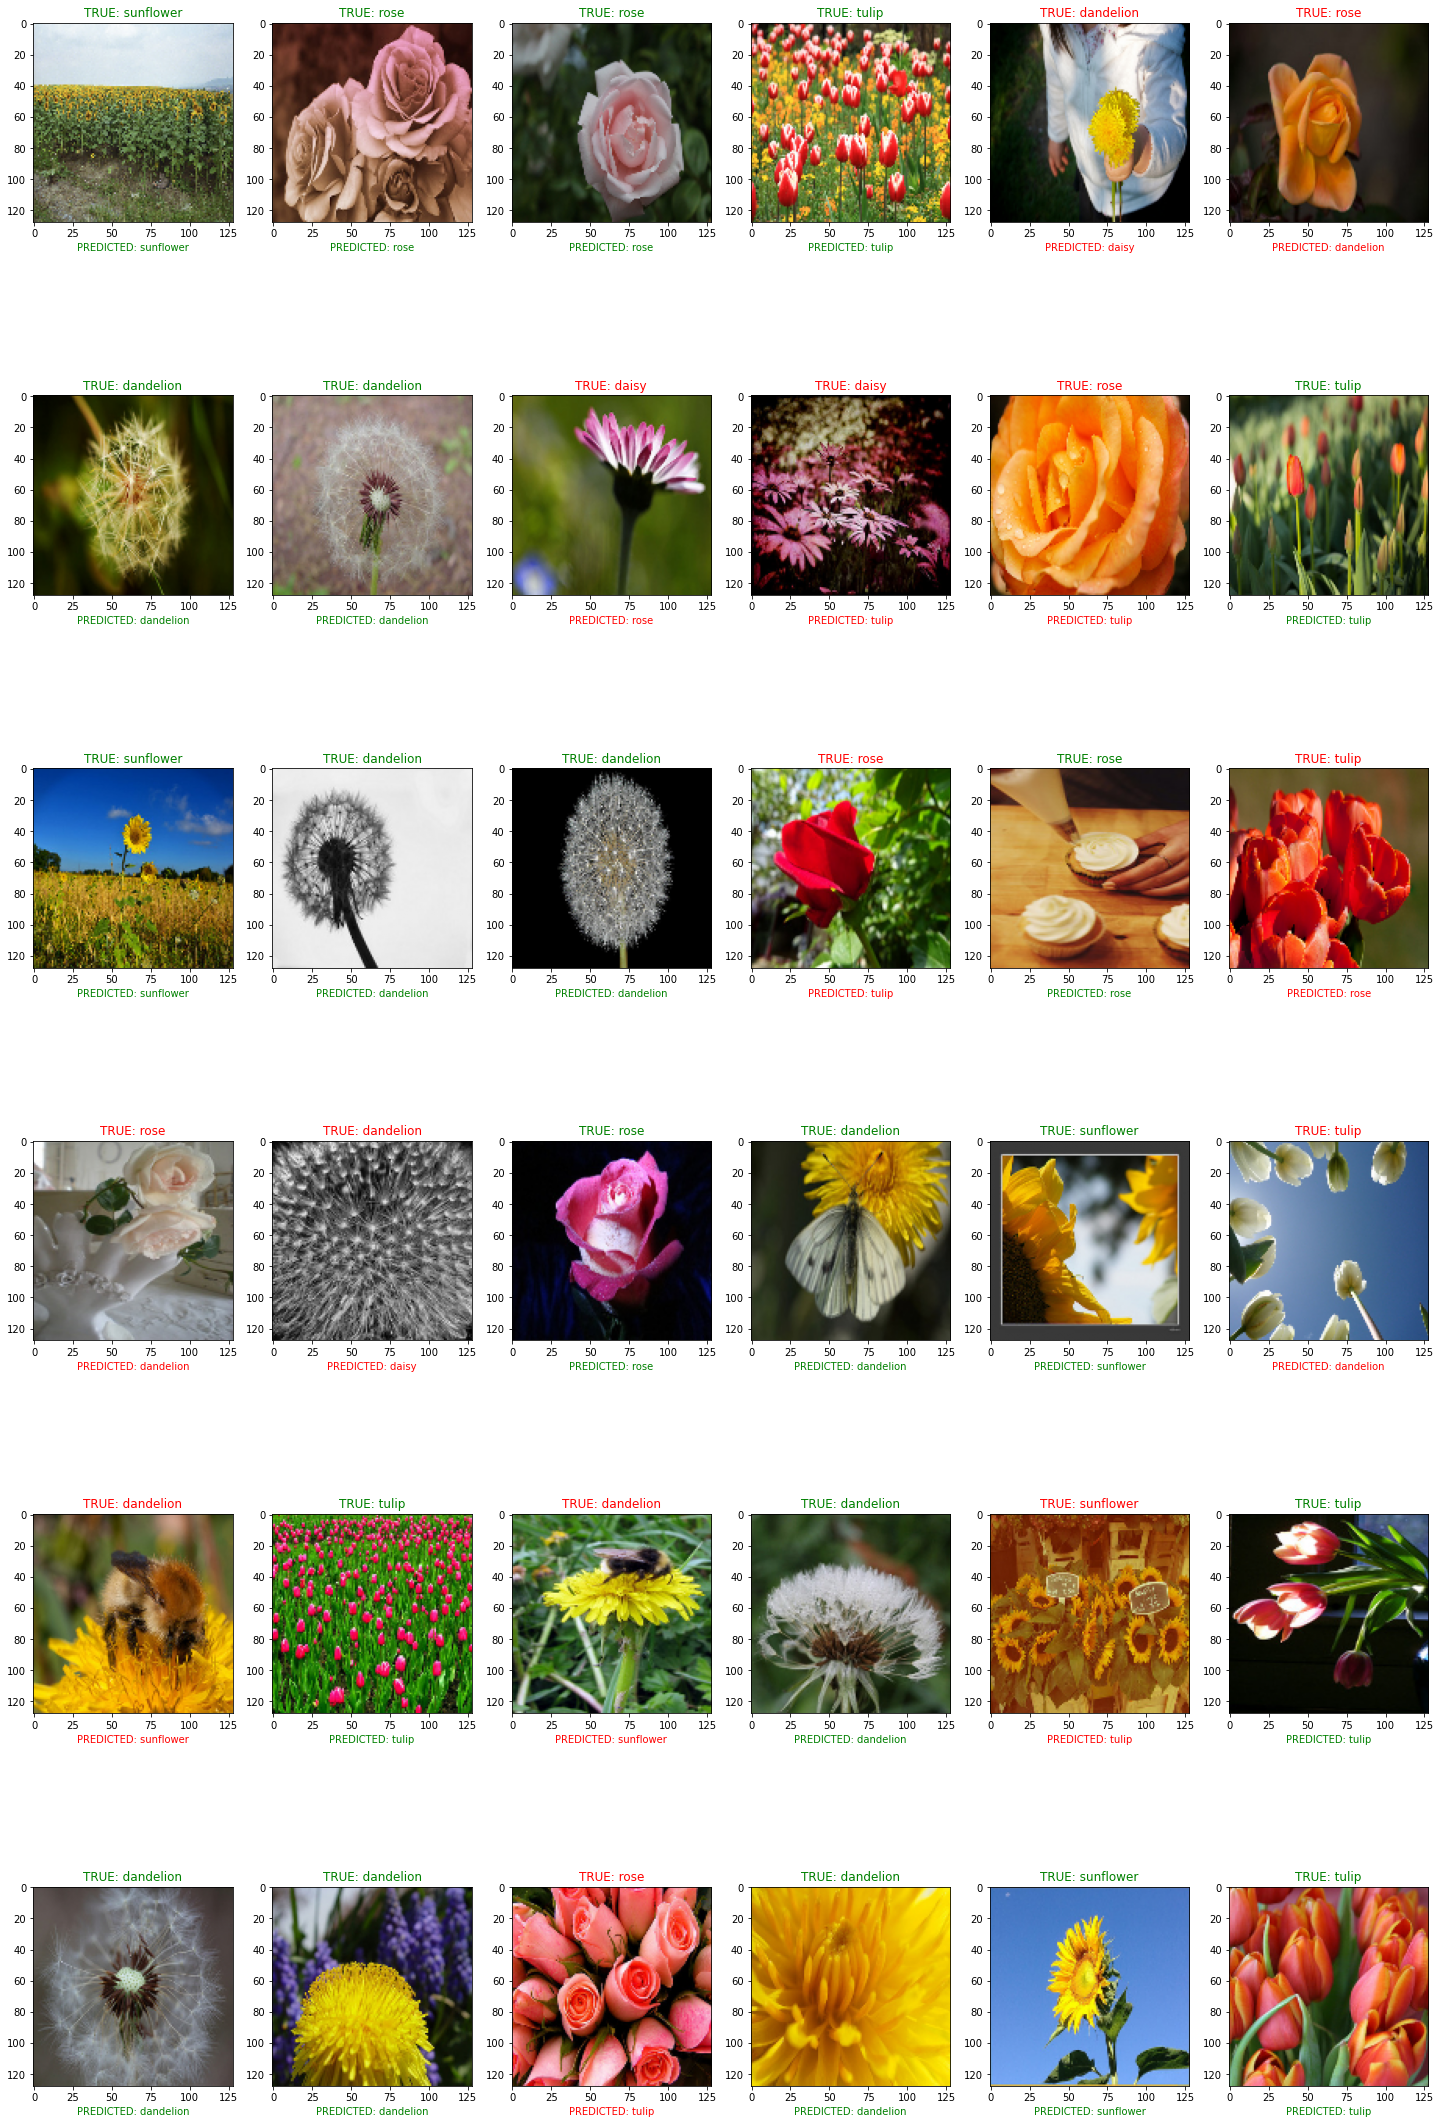

In [ ]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("TRUE: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')